<a href="https://colab.research.google.com/github/B-mohith/Asian_vs_African_elephants/blob/main/Rsnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import torchvision.models as models
import torch.optim as optim
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'

In [4]:
classes = ['african','asian']
num_classes = len(classes)

In [5]:
b = 128
train = ImageFolder(train_dir, transform= transforms.Compose([transforms.ToTensor(),
                                                              transforms.Resize(32),
        transforms.CenterCrop(32),]))
test = ImageFolder(test_dir, transform= transforms.Compose([transforms.ToTensor(),
                                                              transforms.Resize(32),
        transforms.CenterCrop(32),]))
trainloader = torch.utils.data.DataLoader(train, batch_size=b, shuffle=True)
testloader = torch.utils.data.DataLoader(test, batch_size=b, shuffle=False)

In [6]:
resnet = models.resnet18(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 114MB/s]


In [7]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(resnet.parameters())

In [8]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = resnet(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [9]:
in_features = resnet.fc.in_features
dropout_prob = 0.4
resnet.fc = nn.Sequential(
    nn.Linear(in_features, 512),
    nn.ReLU(),
    nn.Dropout(dropout_prob),
    nn.Linear(512, num_classes)
)

Epoch: 0/5, Test acc: 69.68, Train acc: 93.93
Epoch: 1/5, Test acc: 62.77, Train acc: 95.00
Epoch: 2/5, Test acc: 65.96, Train acc: 93.69
Epoch: 3/5, Test acc: 64.89, Train acc: 94.29
Epoch: 4/5, Test acc: 63.83, Train acc: 95.00


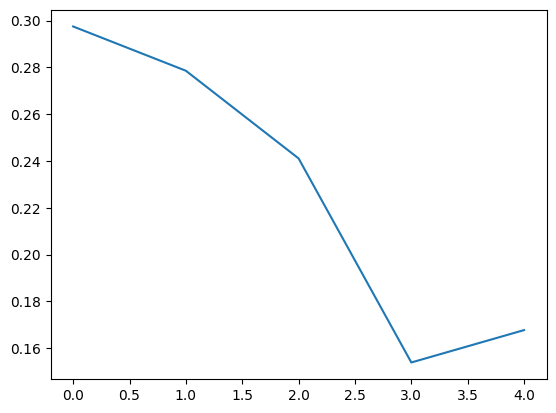

In [11]:
loss_epoch_arr = []
max_epochs = 5

#n_iters = np.ceil(50000/b)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        #inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = resnet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs,
        evaluation(testloader), evaluation(trainloader)))


plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
pic_dir = '/content/af_te9.jpg'
pic_dir2 = '/content/asian.jpg'
pic_dir3 = '/content/indian.jpg'

In [ ]:
def pre_image(image_path,model):
   img = Image.open(image_path)
   transform_norm = transforms.Compose([transforms.ToTensor(),
   transforms.Resize((32,32)),])
   # get normalized image
   img_normalized = transform_norm(img).float()
   img_normalized = img_normalized.unsqueeze_(0)
   # print(img_normalized.shape)
   with torch.no_grad():
      model.eval()
      output =model(img_normalized)
     # print(output)
      index = output.data.cpu().numpy().argmax()
      class_name = classes[index]
      return class_name

In [ ]:
prediction = pre_image(pic_dir,resnet)
print(prediction)

african


In [ ]:
prediction = pre_image(pic_dir2,resnet)
print(prediction)

asian
